In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [25]:
df = pd.read_csv('datasets\creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Class
0    284315
1       492
Name: count, dtype: int64


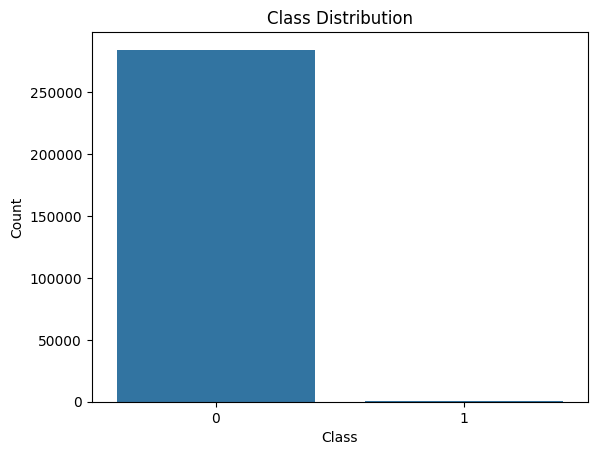

In [26]:
class_counts = df['Class'].value_counts()
print(class_counts)

sns.barplot(x=class_counts.index, y=class_counts.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()


In [27]:
X = df.drop(columns=['Class'])
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

smote_class_counts = y_train_smote.value_counts()
print(smote_class_counts)

Class
0    227451
1    227451
Name: count, dtype: int64


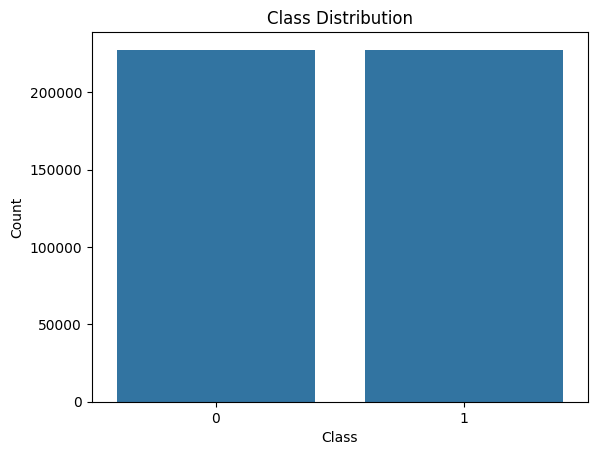

In [28]:
class_counts = y_train_smote.value_counts()
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

In [29]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train_smote = scaler.transform(X_train_smote)

In [30]:
clf = RandomForestClassifier(random_state=42, n_estimators=20)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Without SMOTE")
print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]))

Without SMOTE
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.74      0.84        98

    accuracy                           1.00     56962
   macro avg       0.99      0.87      0.92     56962
weighted avg       1.00      1.00      1.00     56962

ROC AUC Score: 0.9331926408013965


In [31]:
clf_smote = RandomForestClassifier(random_state=42, n_estimators=20)
clf_smote.fit(X_train_smote, y_train_smote)
y_pred_smote = clf_smote.predict(X_test)

print("With SMOTE")
print(classification_report(y_test, y_pred_smote))
print("ROC AUC Score:", roc_auc_score(y_test, clf_smote.predict_proba(X_test)[:, 1]))

With SMOTE
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.84      0.85        98

    accuracy                           1.00     56962
   macro avg       0.93      0.92      0.92     56962
weighted avg       1.00      1.00      1.00     56962

ROC AUC Score: 0.9569530559128546


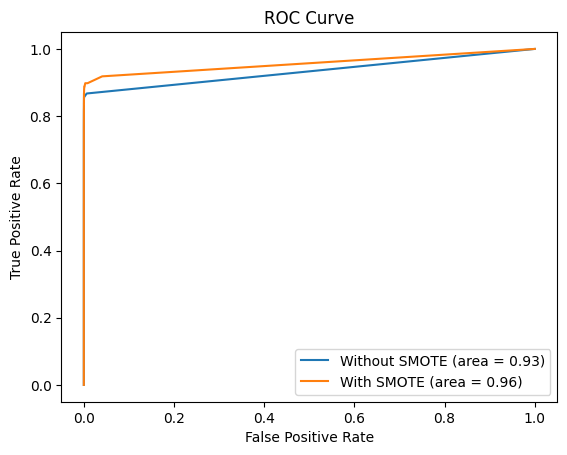

In [32]:
fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
fpr_smote, tpr_smote, _ = roc_curve(y_test, clf_smote.predict_proba(X_test)[:, 1])

plt.figure()
plt.plot(fpr, tpr, label='Without SMOTE (area = %0.2f)' % roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]))
plt.plot(fpr_smote, tpr_smote, label='With SMOTE (area = %0.2f)' % roc_auc_score(y_test, clf_smote.predict_proba(X_test)[:, 1]))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()